### Data Preprocessing

In [15]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report
import tensorflow as tf
import xgboost as xgb

In [16]:
df = pd.read_csv('emg_all_features_labeled.csv')
raw = pd.read_csv('index_finger_motion_raw.csv')
print(df.shape, raw.shape)

(6822, 81) (223793, 8)


### Data Exploration

In [17]:
df.head()

,0.029437,0.051465,0.089432,0.016893,0.014127,0.017735,0.019645,0.014079,0.030692,0.052209,...,2.3516,2,3,6,0,0.1,1,1.1,0.2,1.2
0,0.035060,0.025699,0.025286,0.020039,0.012505,0.016996,0.017674,0.014974,0.036073,0.027496,...,2.3906,3,2,2,2,0,0,1,1,1
1,0.043982,0.033187,0.071985,0.018900,0.016712,0.025793,0.025291,0.020268,0.044961,0.034351,...,2.7813,3,2,4,0,1,2,1,2,1
2,0.032677,0.031038,0.033345,0.020213,0.016290,0.028113,0.027834,0.019944,0.033778,0.032369,...,2.4141,2,1,1,0,0,2,2,1,1
3,0.032101,0.029580,0.035939,0.037279,0.014564,0.022579,0.018042,0.015792,0.033035,0.030936,...,2.3516,2,1,6,4,0,1,0,0,1
4,0.034332,0.029158,0.027977,0.025456,0.015080,0.023670,0.025631,0.018851,0.035562,0.030472,...,2.6641,2,2,1,2,0,2,2,2,1


In [18]:
df.describe()

,0.029437,0.051465,0.089432,0.016893,0.014127,0.017735,0.019645,0.014079,0.030692,0.052209,...,2.3516,2,3,6,0,0.1,1,1.1,0.2,1.2
count,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,...,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000
mean,0.040823,0.065489,0.097874,0.036480,0.024884,0.045121,0.099462,0.054163,0.042424,0.066619,...,8.709442,2.051305,3.880094,4.994723,1.738053,0.733656,2.194811,4.317942,2.604955,3.847112
std,0.039008,0.055671,0.098010,0.029872,0.017541,0.044636,0.109739,0.066580,0.038112,0.054745,...,11.202169,2.727362,3.367661,3.830100,2.516240,1.432499,2.544202,4.110435,3.412000,1.962840
min,0.006165,0.006814,0.006432,0.006443,0.006949,0.006798,0.006615,0.006122,0.010712,0.011779,...,0.945310,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.015790,0.027960,0.034170,0.017518,0.013873,0.019946,0.019318,0.014736,0.018266,0.029564,...,2.421900,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.027571,0.050213,0.059132,0.025909,0.020272,0.031550,0.052236,0.026368,0.029022,0.051035,...,4.085900,1.000000,3.000000,5.000000,0.000000,0.000000,1.000000,3.000000,1.000000,4.000000
75%,0.049174,0.084064,0.122622,0.046268,0.030887,0.053941,0.139770,0.063585,0.049878,0.084332,...,9.753900,3.000000,6.000000,8.000000,3.000000,1.000000,4.000000,8.000000,4.000000,5.000000
max,0.309780,0.419220,0.487810,0.245450,0.221130,0.459510,0.548000,0.432420,0.308750,0.417830,...,78.719000,13.000000,14.000000,14.000000,13.000000,11.000000,14.000000,14.000000,14.000000,7.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6822 entries, 0 to 6821
Data columns (total 81 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   0.029437     6822 non-null   float64
 1   0.051465     6822 non-null   float64
 2   0.089432     6822 non-null   float64
 3   0.016893     6822 non-null   float64
 4   0.014127     6822 non-null   float64
 5   0.017735     6822 non-null   float64
 6   0.019645     6822 non-null   float64
 7   0.014079     6822 non-null   float64
 8   0.030692     6822 non-null   float64
 9   0.052209     6822 non-null   float64
 10  0.08977      6822 non-null   float64
 11  0.019609     6822 non-null   float64
 12  0.016973     6822 non-null   float64
 13  0.020182     6822 non-null   float64
 14  0.021575     6822 non-null   float64
 15  0.017081     6822 non-null   float64
 16  -0.16406     6822 non-null   float64
 17  -0.28906     6822 non-null   float64
 18  -0.53906     6822 non-null   float64
 19  -0.054

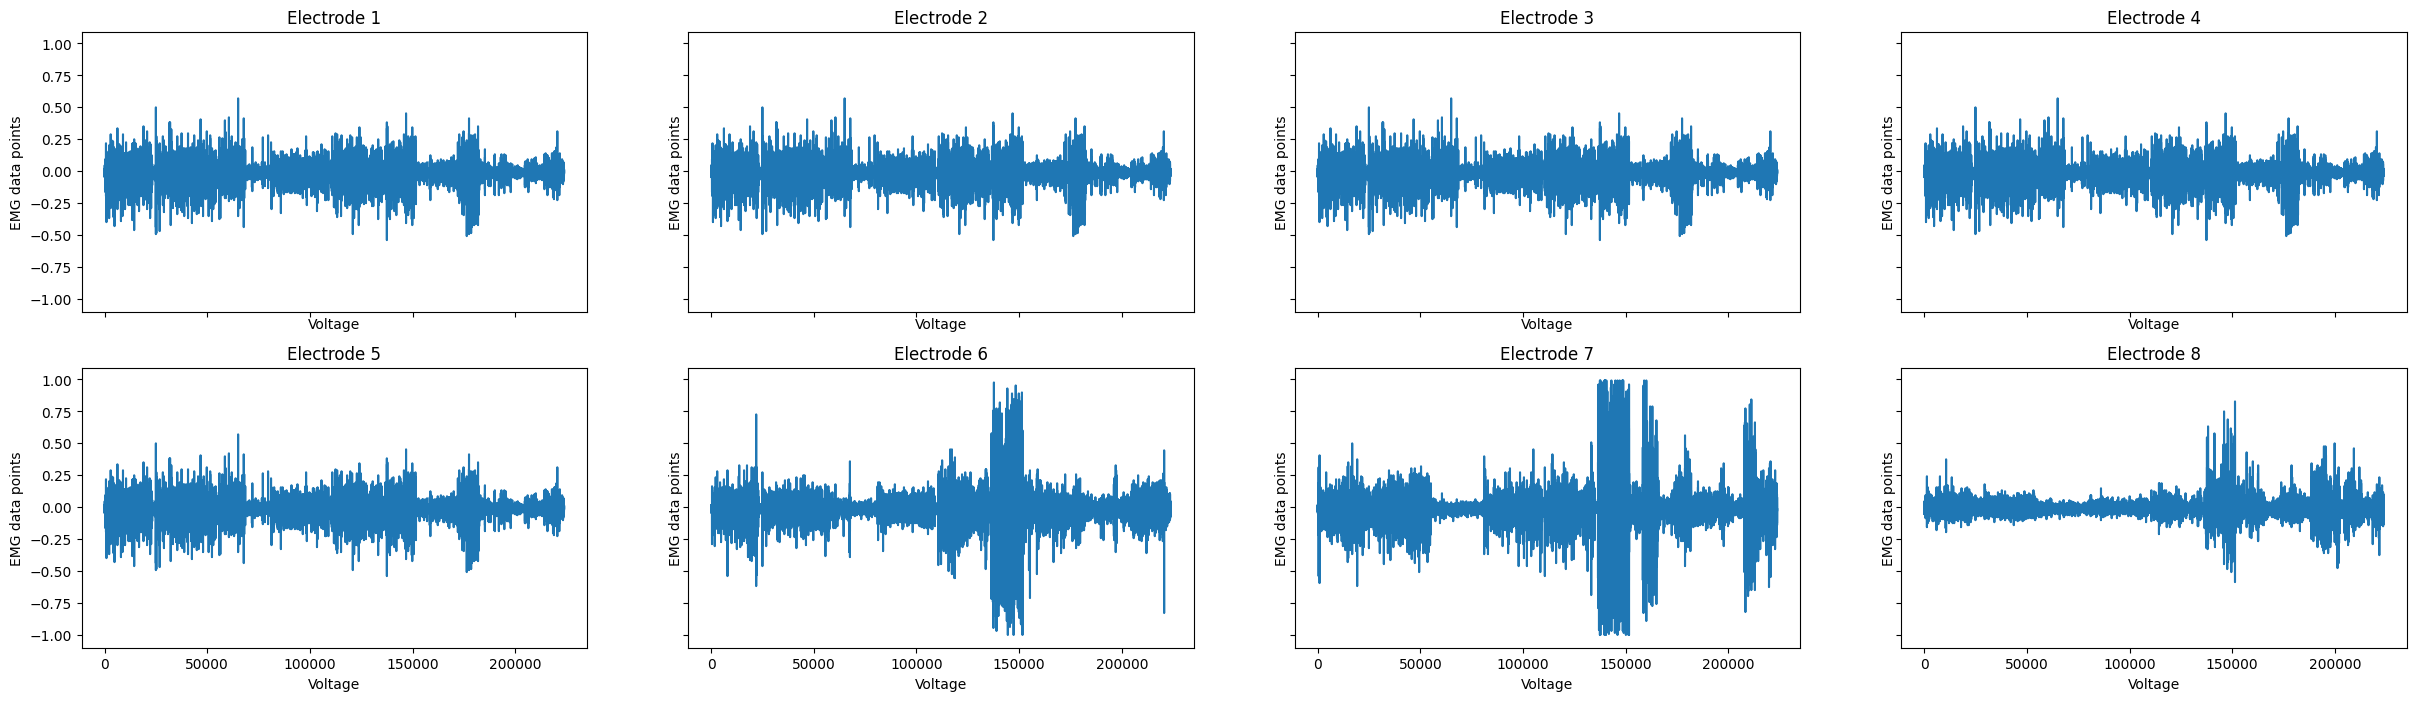

In [20]:
def plot_data(data):    
    fig, axes = plt.subplots(2,4, figsize=(30, 8), sharex=True, sharey=True)
    for i in range(2):
        for j in range(4):
            axes[i][j].plot(data.iloc[:,i*j])
            axes[i][j].set_title('Electrode ' + str(i*4 + j + 1))
            axes[i][j].set_xlabel('Voltage')
            axes[i][j].set_ylabel('EMG data points')

        
plot_data(raw)


### Inferences from the Graph
1. Sharp spikes or points in an EMG plot can indicate the activation of a muscle or group of muscles. When a muscle contracts, it generates an electrical signal that is recorded by the EMG electrodes. This signal appears as a sharp spike or point in the EMG plot.
2. The size and shape of the spike can provide information about the strength and duration of the muscle contraction. A larger and longer spike typically indicates a stronger and more sustained muscle contraction.
3. Sharp spikes or points in an EMG plot can also be caused by noise or interference in the recording system, or by movement artifacts.


### Splitting the dataset into train and test set

In [21]:
x = df.iloc[:,:80].copy()
y = df.iloc[:,80].copy()
print(x.shape)
print(y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

(6822, 80)
(6822,)


In [22]:
y.value_counts()

1.2
4    1084
3    1045
1    1039
2    1017
5    1016
7     895
6     726
Name: count, dtype: int64

### Feature Scaling

In [23]:
SC = StandardScaler()
x_train = pd.DataFrame(SC.fit_transform(x_train))
x_test = pd.DataFrame(SC.transform(x_test))

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [25]:
evalset = [(x_train, y_train), (x_test,y_test)]

### Random Forest


In [26]:
model_RF = RandomForestClassifier(n_estimators = 100, random_state=1)

In [27]:
model_RF.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [28]:
y_pred = model_RF.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy for RF: %.2f%%" % (accuracy_rf * 100.00))

Accuracy for RF: 94.37%


In [29]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='macro')
prec = precision_score(y_test,y_pred,average='macro')
rec = recall_score(y_test,y_pred,average='macro')

In [30]:
results = pd.DataFrame(pd.DataFrame([['Random Forest', acc, f1, prec, rec]],
               columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall']))

In [31]:
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Random Forest,0.943728,0.945472,0.946253,0.945656


In [32]:
y_true = np.array(y_test)

In [33]:
cm_rf = confusion_matrix(y_true, y_pred)

In [34]:
class_report = classification_report(y_true, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       243
           1       0.93      0.91      0.92       233
           2       0.97      0.95      0.96       265
           3       0.91      0.95      0.93       280
           4       0.97      0.89      0.93       266
           5       0.98      1.00      0.99       197
           6       0.97      0.96      0.97       222

    accuracy                           0.94      1706
   macro avg       0.95      0.95      0.95      1706
weighted avg       0.94      0.94      0.94      1706



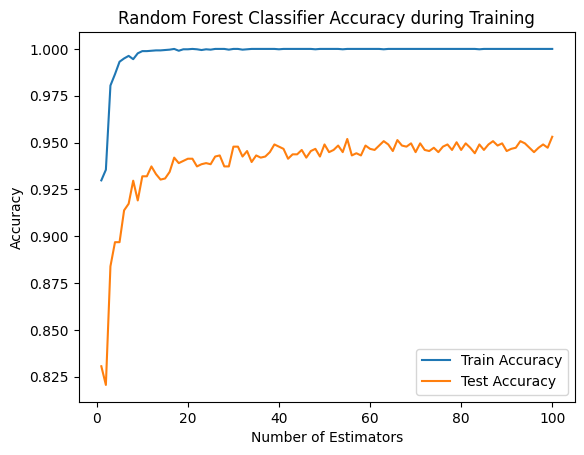

In [35]:
# Plot the accuracy graph
n_estimators = range(1, 101)  # Number of estimators to plot
train_accuracy = []
test_accuracy = []

for n in n_estimators:
    model_rf = RandomForestClassifier(n_estimators=n)
    model_rf.fit(x_train, y_train)
    y_train_pred = model_rf.predict(x_train)
    y_test_pred = model_rf.predict(x_test)
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

plt.plot(n_estimators, train_accuracy, label='Train Accuracy')
plt.plot(n_estimators, test_accuracy, label='Test Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Accuracy during Training')
plt.legend()
plt.show()

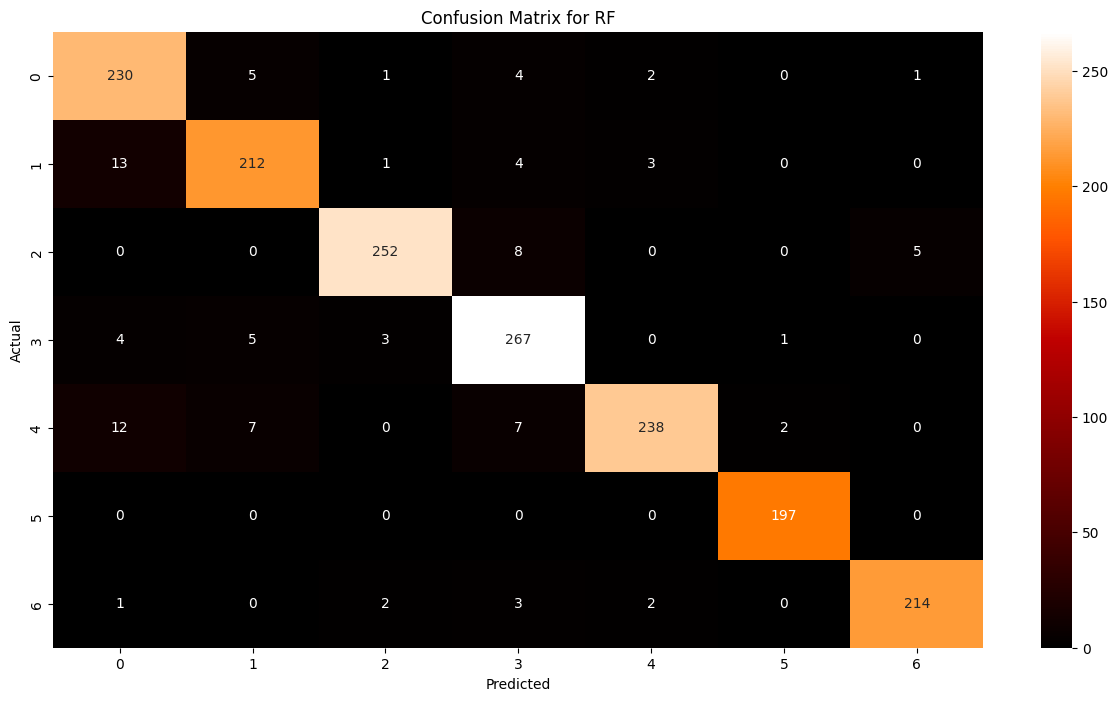

In [36]:
plt.figure(figsize = (15,8))
sns.heatmap(cm_rf, annot=True, fmt='g', cmap='gist_heat', cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for RF")
plt.show()

### XGB Classifier

In [37]:
model_XGB = xgb.XGBClassifier()

In [38]:
model_XGB.fit(x_train, y_train, eval_metric='merror', eval_set=evalset, verbose=False)

C:\Users\SHIVANSHU\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [39]:
y_pred = model_XGB.predict(x_test)
accuracy_xgb = accuracy_score(y_test, y_pred)
print("Accuracy for XGB: %.2f%%" % (accuracy_xgb * 100.00))

Accuracy for XGB: 94.67%


In [40]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='macro')
prec = precision_score(y_test,y_pred,average='macro')
rec = recall_score(y_test,y_pred,average='macro')

In [41]:
result_xgb = pd.DataFrame(pd.DataFrame([['XGB Classifier', acc, f1, prec, rec]],
               columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall']))

In [42]:
result_xgb

,Model,Accuracy,F1 Score,Precision,Recall
0,XGB Classifier,0.946659,0.948608,0.948954,0.94863


In [43]:
results= pd.concat([results, result_xgb], ignore_index= True)

In [44]:
accuracy_results = model_XGB.evals_result()
train_accuracy = accuracy_results['validation_0']['merror']
test_accuracy = accuracy_results['validation_1']['merror']

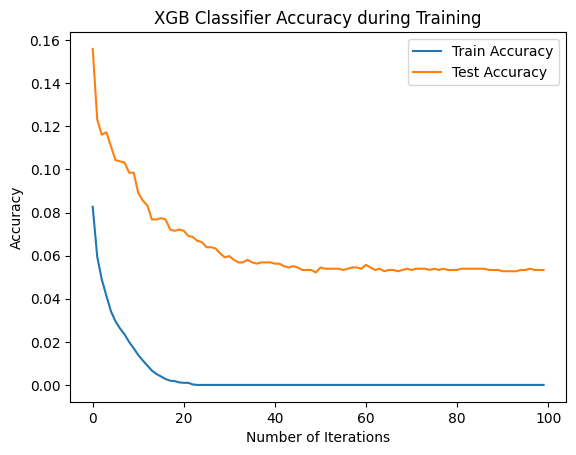

In [45]:
# Plot the accuracy graph
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('XGB Classifier Accuracy during Training')
plt.legend()
plt.show()

In [46]:
cm_xgb = confusion_matrix(y_true, y_pred)

In [47]:
class_report = classification_report(y_true, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       243
           1       0.93      0.93      0.93       233
           2       0.97      0.97      0.97       265
           3       0.93      0.95      0.94       280
           4       0.94      0.90      0.92       266
           5       1.00      1.00      1.00       197
           6       0.98      0.96      0.97       222

    accuracy                           0.95      1706
   macro avg       0.95      0.95      0.95      1706
weighted avg       0.95      0.95      0.95      1706



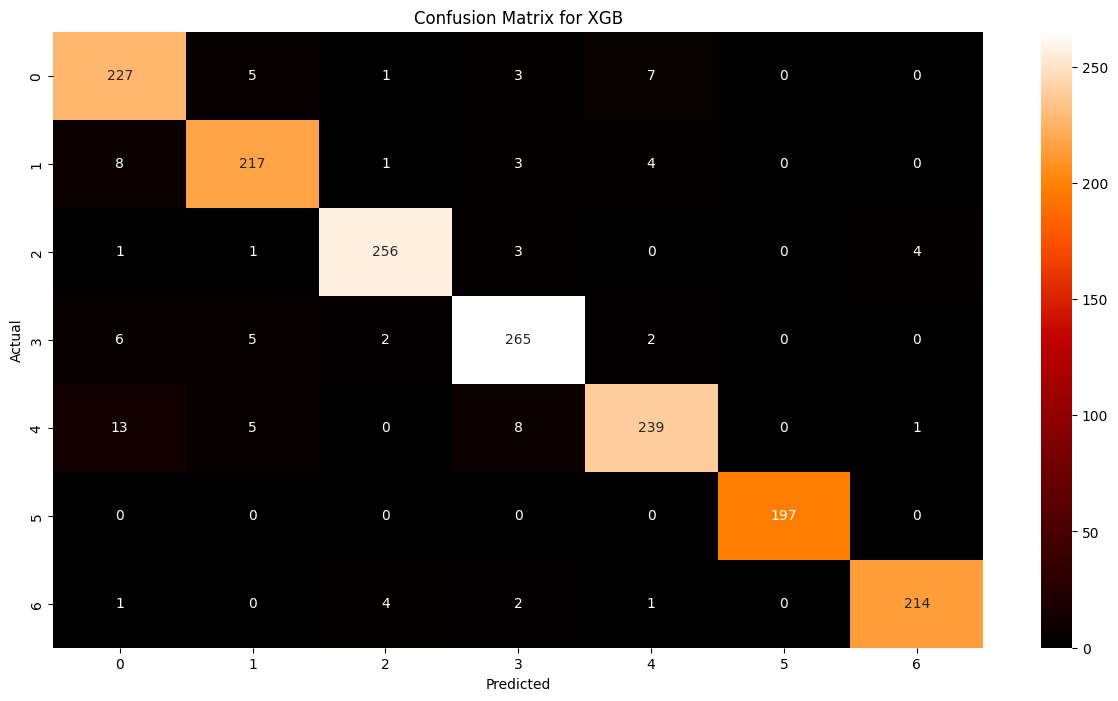

In [48]:
plt.figure(figsize = (15,8))
sns.heatmap(cm_xgb, annot=True, fmt='g', cmap='gist_heat',cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for XGB")
plt.show()

### SVM Classifier


In [49]:
model_SVM = svm.SVC(kernel='linear')

In [50]:
model_SVM.fit(x_train, y_train)

SVC(kernel='linear')

In [51]:
y_pred = model_SVM.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print("Accuracy for SVM: %.2f%%" % (accuracy_svm * 100.00))

Accuracy for SVM: 88.86%


In [52]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='macro')
prec = precision_score(y_test,y_pred,average='macro')
rec = recall_score(y_test,y_pred,average='macro')

In [53]:
results_svm = pd.DataFrame(pd.DataFrame([['SVM Classifier', acc, f1, prec, rec]],
               columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall']))

In [54]:
results_svm

,Model,Accuracy,F1 Score,Precision,Recall
0,SVM Classifier,0.888628,0.892456,0.89514,0.892235


In [55]:
results= pd.concat([results, results_svm], ignore_index= True)

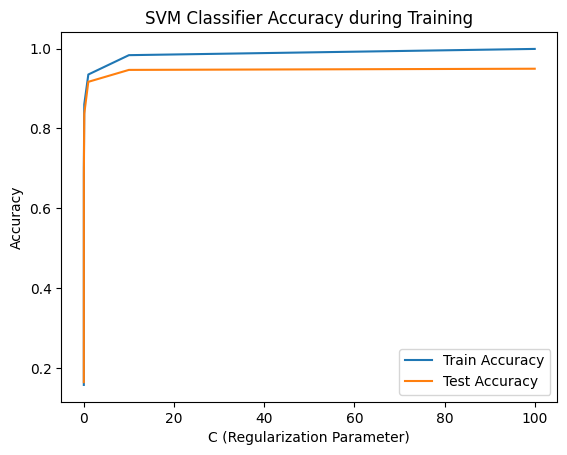

In [56]:
# Plot the accuracy graph
C_values = [0.001, 0.01, 0.1, 1, 10, 100]  # Values of C to plot
train_accuracy = []
test_accuracy = []

for C in C_values:
    model_svm = svm.SVC(C=C)
    model_svm.fit(x_train, y_train)
    y_train_pred = model_svm.predict(x_train)
    y_test_pred = model_svm.predict(x_test)
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

plt.plot(C_values, train_accuracy, label='Train Accuracy')
plt.plot(C_values, test_accuracy, label='Test Accuracy')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.title('SVM Classifier Accuracy during Training')
plt.legend()
plt.show()

In [57]:
cm_svm = confusion_matrix(y_true, y_pred)

In [58]:
class_report = classification_report(y_true, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.84      0.78       243
           1       0.87      0.84      0.85       233
           2       0.97      0.95      0.96       265
           3       0.86      0.89      0.88       280
           4       0.91      0.79      0.85       266
           5       0.98      0.99      0.98       197
           6       0.95      0.93      0.94       222

    accuracy                           0.89      1706
   macro avg       0.90      0.89      0.89      1706
weighted avg       0.89      0.89      0.89      1706



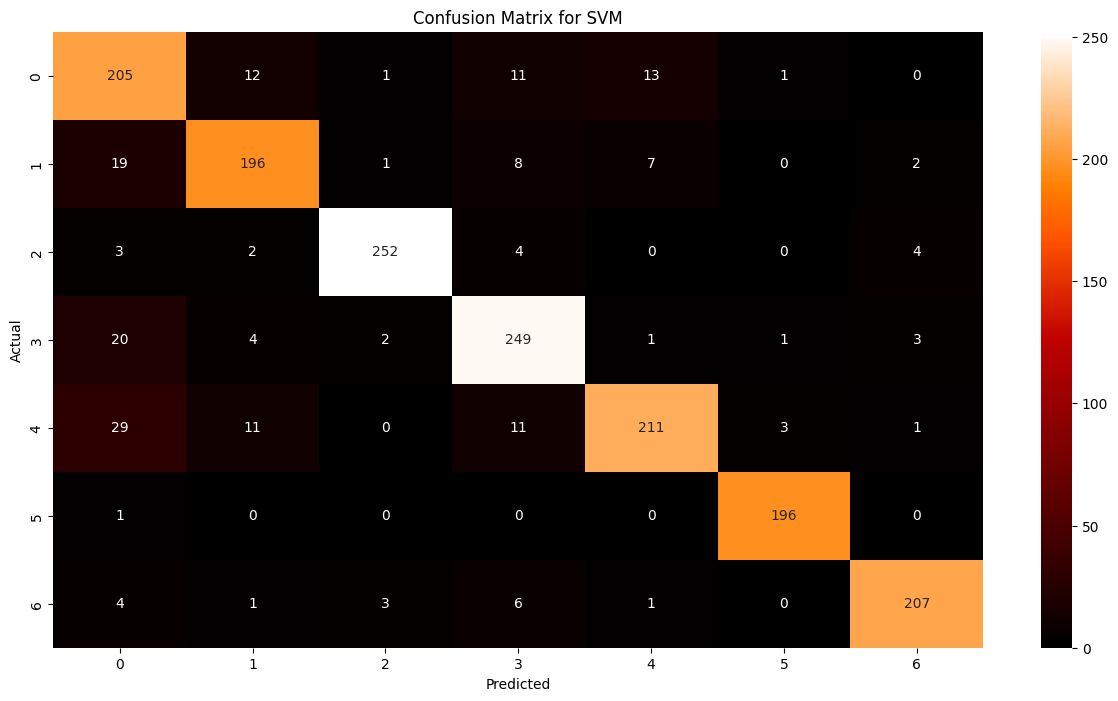

In [59]:
plt.figure(figsize = (15,8))
sns.heatmap(cm_svm, annot=True, fmt='g', cmap='gist_heat', cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for SVM")
plt.show()

### GNB Classifier


In [60]:
model_GNB = GaussianNB()

In [61]:
model_GNB.fit(x_train, y_train)

GaussianNB()

In [62]:
y_pred = model_GNB.predict(x_test)
accuracy_gnb = accuracy_score(y_test, y_pred)
print("Accuracy for GNB: %.2f%%" % (accuracy_gnb * 100.00))

Accuracy for GNB: 58.26%


In [63]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='micro')
prec = precision_score(y_test,y_pred,average='micro')
rec = recall_score(y_test,y_pred,average='micro')

In [64]:
results_gnb = pd.DataFrame(pd.DataFrame([['GNB Classifier', acc, f1, prec, rec]],
               columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall']))

In [65]:
results_gnb

,Model,Accuracy,F1 Score,Precision,Recall
0,GNB Classifier,0.582649,0.582649,0.582649,0.582649


In [66]:
results= pd.concat([results, results_gnb], ignore_index= True)

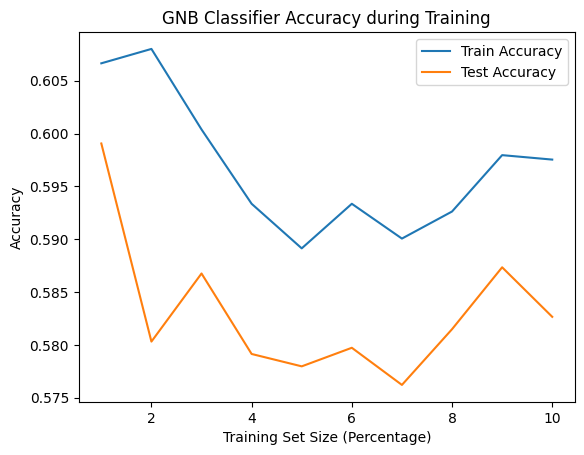

In [67]:
# Plot the accuracy graph
train_accuracy = []
test_accuracy = []

# Train the model with different training set sizes
for i in range(1, 11):
    train_size = int(len(x_train) * (i / 10))
    x_train_subset = x_train[:train_size]
    y_train_subset = y_train[:train_size]
    model_GNB.fit(x_train_subset, y_train_subset)
    y_train_pred = model_GNB.predict(x_train_subset)
    y_test_pred = model_GNB.predict(x_test)
    train_accuracy.append(accuracy_score(y_train_subset, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

plt.plot(range(1, 11), train_accuracy, label='Train Accuracy')
plt.plot(range(1, 11), test_accuracy, label='Test Accuracy')
plt.xlabel('Training Set Size (Percentage)')
plt.ylabel('Accuracy')
plt.title('GNB Classifier Accuracy during Training')
plt.legend()
plt.show()

In [68]:
cm_gnb = confusion_matrix(y_true, y_pred)

In [69]:
class_report = classification_report(y_true, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.26      0.28       243
           1       0.60      0.39      0.47       233
           2       0.78      0.75      0.76       265
           3       0.57      0.36      0.44       280
           4       0.42      0.73      0.53       266
           5       0.89      0.94      0.91       197
           6       0.67      0.73      0.70       222

    accuracy                           0.58      1706
   macro avg       0.60      0.59      0.59      1706
weighted avg       0.59      0.58      0.57      1706



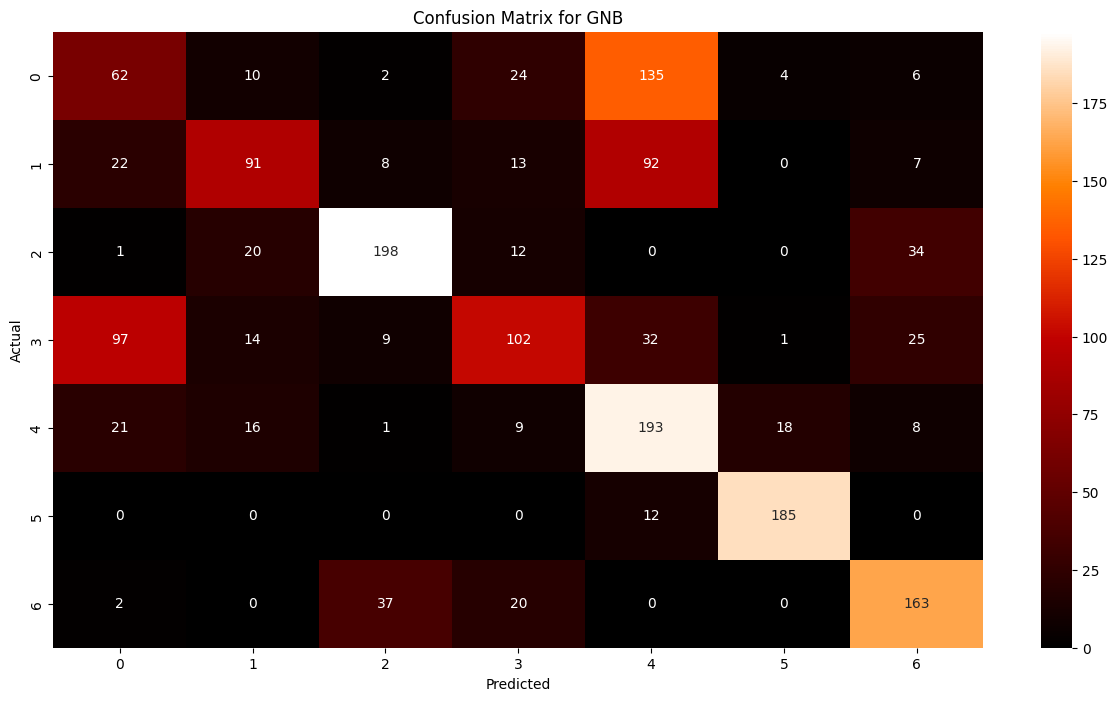

In [70]:
plt.figure(figsize = (15,8))
sns.heatmap(cm_gnb, annot=True, fmt='g', cmap='gist_heat', cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for GNB")
plt.show()

In [71]:
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Random Forest,0.943728,0.945472,0.946253,0.945656
1,XGB Classifier,0.946659,0.948608,0.948954,0.948630
2,SVM Classifier,0.888628,0.892456,0.895140,0.892235
3,GNB Classifier,0.582649,0.582649,0.582649,0.582649
